In [3]:
# 데이터 전처리 및 시각화 하는데 거의 무조건 사용하는 라이브러리 3개
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 관련 임포트
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer  # 로지스틱 회귀와 결정트리 실습에 사용할 데이터셋

# SVM 실습에 사용할 합성 데이터 생성 및 시각화 툴
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# 로지스틱 회귀모델
from sklearn.linear_model import LogisticRegression

# 결정트리 모델과 시각화 관련 툴
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

# SVM 모델
from sklearn.svm import SVC  # SVM 분류기(classifier)
from sklearn.gaussian_process.kernels import RBF

### 실습 데이터셋

* 데이터셋: Breast cancer wisconsin (diagnostic) dataset

* 데이터셋 개요 :
  이 실습 데이터셋은 위스콘신 유방암 데이터셋으로, 총 569개의 샘플로
  구성되어 있습니다. 각 샘플을 구성하는 30개의 피쳐를 활용해 유방암이 악성(malignant)인지, 양성
  (benign)인지 여부를 분류하는 이진분류(Binary Classification)문제를 실습해보겠습니다.
* 데이터셋 저작권 : CC BY 4.0


In [4]:
cancer = load_breast_cancer() # 데이터 불러오

print(cancer["DESCR"]) # 데이터 설명

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
# 데이터셋의 입력값이 몇개의 샘플과 몇개의 변수로 구성되어있는지 확인
print(cancer["data"].shape)

# 데이터셋의 인풋값을 구성하는 feature들의 이름을 확인
print(cancer["feature_names"])

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
# 데이터셋의 target을 확인
print(cancer["target"].shape)
# target의 각 범주가 어떤 클래스에 해당하는지 확인
print(cancer["target_names"])
# 데이터셋의 target 확인
cancer["target"]

(569,)
['malignant' 'benign']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# target내에 양성, 악성 샘플 수 확인
count_malignant, count_benign = np.bincount(cancer["target"])
print(f"총 {count_malignant}개의 악성 샘플과 {count_benign}개의 양성 샘플 포함.")

총 212개의 악성 샘플과 357개의 양성 샘플 포함.


## 데이터 시각화 및 특성 파악

In [10]:
# 이후 코드가 간단해지도록 alias 설정
data = cancer["data"]
target = cancer["target"]

# 데이터에서 악성, 양성에 해당하는 샘플만 선택해 새로운 변수로 저장
data_malignant = data[target == 0]
data_benign = data[target == 1]

# 데이터셋 분리의 결과 확인
print("malignant(악성) 샘플 : ", data_malignant.shape)
print("benign(양성) 샘플 : ", data_benign.shape)

malignant(악성) 샘플 :  (212, 30)
benign(양성) 샘플 :  (357, 30)


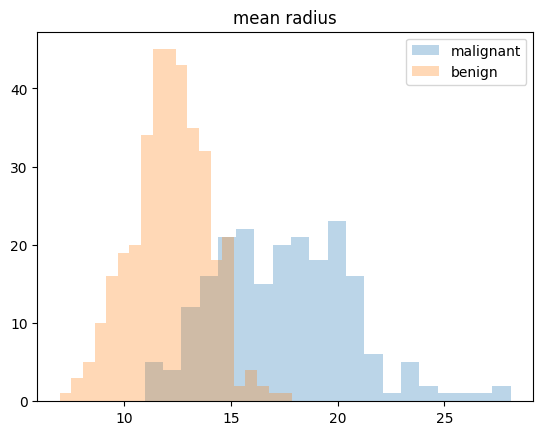

In [11]:
# 시각화에 사용할 변수의 인덱스를 지정
feature_idx = 0

# histogram의 형태로 악성, 양성 각각 샘플의 분포를 시각화.
plt.hist(data_malignant[:, feature_idx], bins=20, alpha=0.3)
plt.hist(data_benign[:, feature_idx], bins=20, alpha=0.3)

# 데이터셋의 피쳐, 클래스 이름 정보를 활용해 그래프에 정보를 추가
plt.title(cancer["feature_names"][feature_idx])
plt.legend(cancer["target_names"])

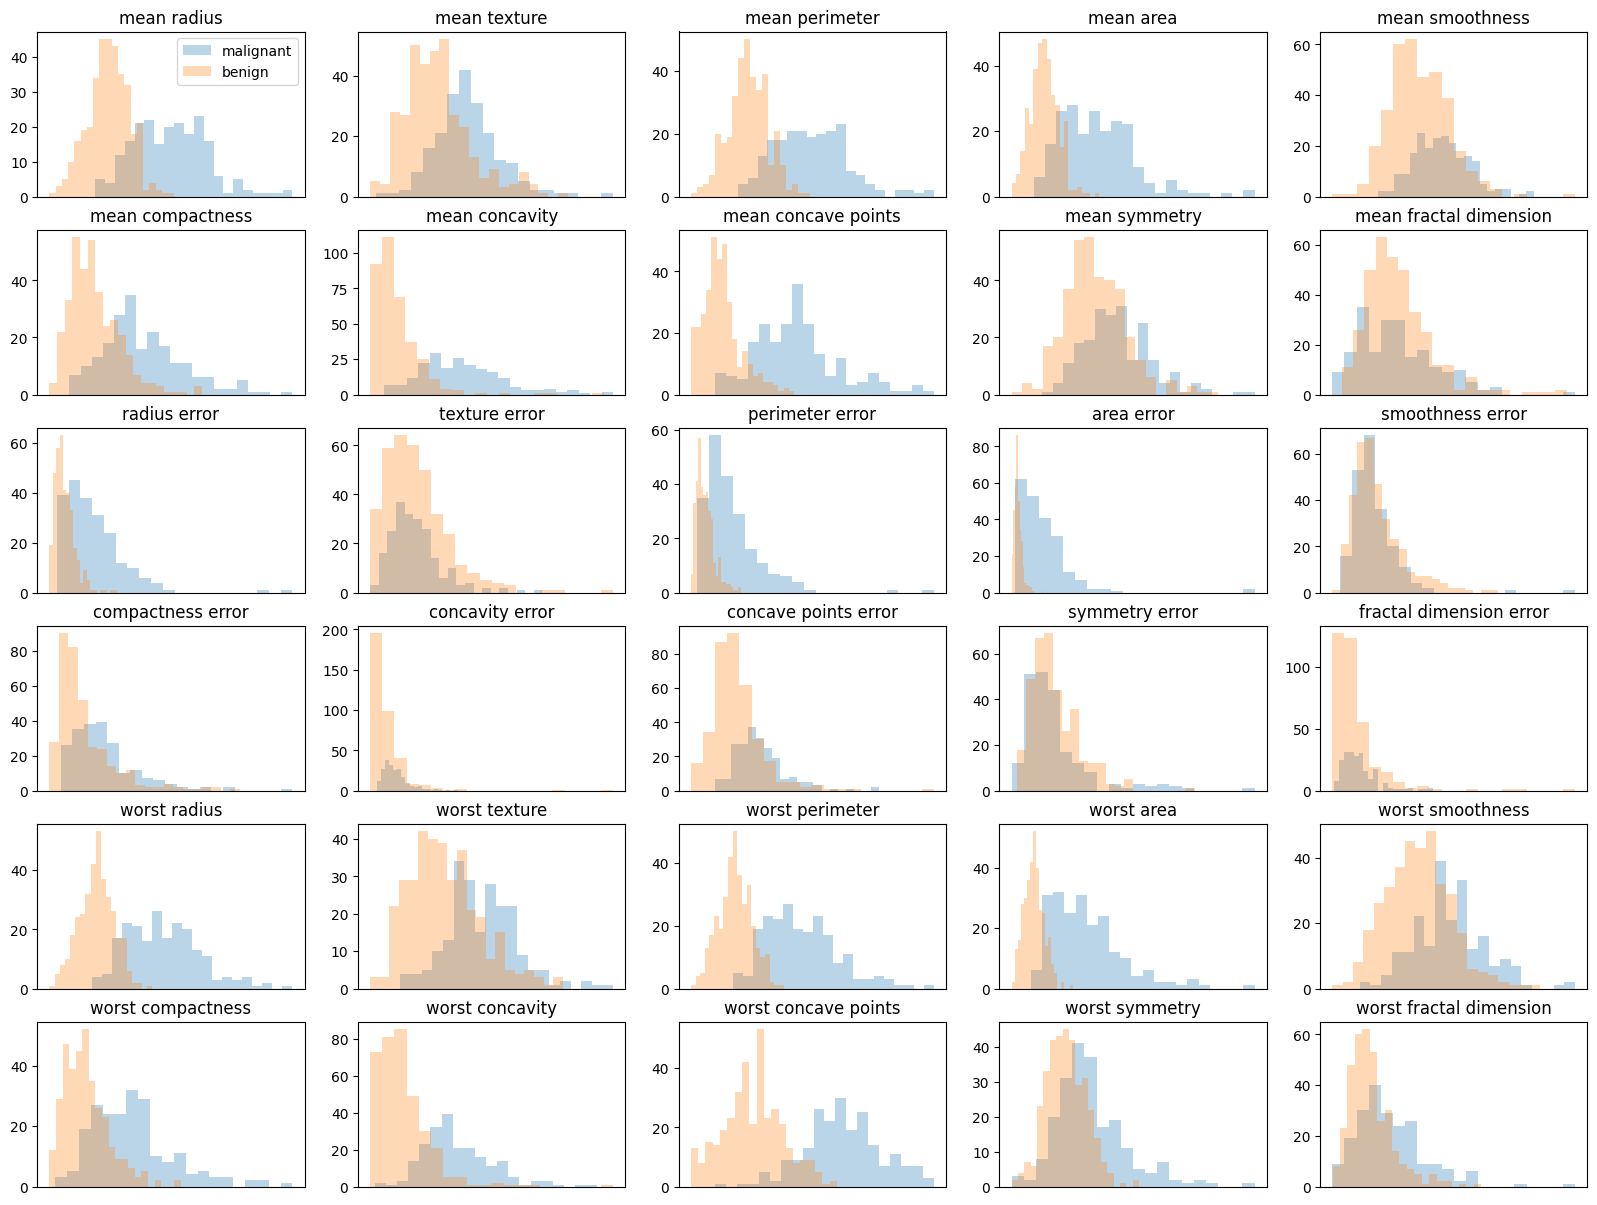

In [12]:
# 30개의 전체 변수 각각에 대해 같은 방식의 시각화를 진행
plt.figure(figsize=[20,15])
for feature_idx in range(30):
    plt.subplot(6, 5, feature_idx + 1)

    # histogram의 형태로 악성, 양성 각각 샘플의 분포를 시각화.
    plt.hist(data_malignant[:, feature_idx], bins=20, alpha=0.3)
    plt.hist(data_benign[:, feature_idx], bins=20, alpha=0.3)

    # 데이터셋의 피쳐, 클래스 이름 정보를 활용해 그래프에 정보를 추가
    plt.title(cancer["feature_names"][feature_idx])
    # 악성/양성에 대한 범례(legend)는 첫번째 histogram에만 표시
    if feature_idx == 0:
        plt.legend(cancer["target_names"])
    plt.xticks([])

In [13]:
# 결과 재현성을 위해 random seed를 설정합니다.
random_state = 1234

# 데이터셋을 8:2로 분할해 학습용 / 평가용으로 사용합니다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=random_state)

# 모델을 초기화하고 학습 데이터에서 최적화를 진행합니다.
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# 테스트셋에 대한 결과 정확도를 계산합니다.
score = model.score(X_test, y_test)

print('scores =', score)

scores = 0.9473684210526315


In [14]:
# 학습된 모델에서 결과 확률값을 그대로 가져오기
probs = model.predict_proba(X_test)[:, 1]

# 기본값인 0.5를 기준으로 판단한 결과는 원래 모델의 예측 함수(predict)와 동일
print("원래 예측값: \n", model.predict(X_test))
prediction = (probs > 0.5).astype(int)
print(f"한계값 0.5로 판단한 예측값: \n", prediction)

# y_test == 0(양성)이지만 prediction == 1(음성)인 False Negative의 수를 계산해 출력
false_neg = ~y_test & prediction  # ~, &는 각각 bitwise "not", "and" 연산자
print(f"위음성(False Negative) 개수: {false_neg.sum()} 개")

# 한계값을 조절해 위음성 빈도를줄이기
threshold = 0.7

prediction = (probs > threshold).astype(int)
print(f"한계값 {threshold}로 판단한 예측값: \n", prediction)

false_neg = ~y_test & prediction
print(f"위음성(False Negative) 개수: {false_neg.sum()} 개")


원래 예측값: 
 [1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0]
한계값 0.5로 판단한 예측값: 
 [1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0]
위음성(False Negative) 개수: 6 개
한계값 0.7로 판단한 예측값: 
 [1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 0]
위음성(False Negative) 개수: 5 개


In [15]:
# 결정트리 학습
dec_tree = DecisionTreeClassifier(max_depth=10, random_state=1234)
dec_tree.fit(X_train, y_train)

# 결과 정확도 출력
print(f"학습 데이터셋 분류 정확도: {dec_tree.score(X_train, y_train):.3f}")
print(f"평가 데이터셋 분류 정확도: {dec_tree.score(X_test, y_test):.3f}")

학습 데이터셋 분류 정확도: 1.000
평가 데이터셋 분류 정확도: 0.904


In [17]:
# "tree.dot"이라는 이름으로, 학습한 그래프 파일을 저장
export_graphviz(dec_tree, out_file="tree.dot", class_names=cancer["target_names"],
                feature_names=cancer["feature_names"], impurity=True, filled=True)

# 저장한 파일을 불러와 graphviz로 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [18]:
print("Feature importances:")
print(dec_tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04080345 0.         0.         0.         0.01734378
 0.         0.         0.01839585 0.02928952 0.00758474 0.11248202
 0.02119796 0.         0.00939362 0.72738542 0.         0.01612362]


(-1.0, 30.0)

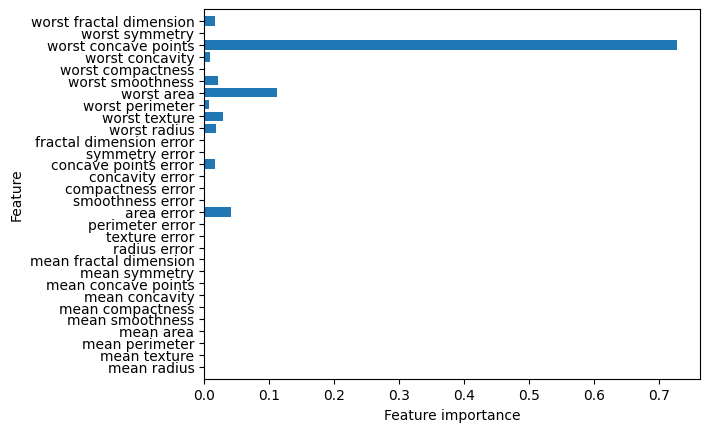

In [19]:
n_features = data.shape[1]
plt.barh(np.arange(n_features), dec_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer["feature_names"])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)


feature importance:  0.7273854248265089


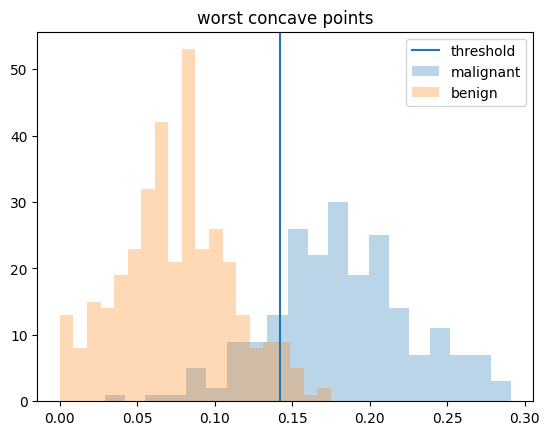

In [20]:
# 시각화를 수행할 변수를 지정합니다.
feature_name = "worst concave points"  # feature importance 높은 node
feature_threshold = 0.142
# feature_name = "worst fractal dimension"  # feature importance 낮은 node
# feature_threshold = 0.065

# 주어진 변수 이름을 통해 index를 찾고 feature importance값을 출력
list_feature_names = cancer["feature_names"].tolist()
feature_idx = list_feature_names.index(feature_name)  # builtin list의 index함수
print("feature importance: ", dec_tree.feature_importances_[feature_idx])

# histogram의 형태로 악성, 양성 각각 샘플의 분포를 시각화.
plt.hist(data_malignant[:, feature_idx], bins=20, alpha=0.3)
plt.hist(data_benign[:, feature_idx], bins=20, alpha=0.3)

# 데이터셋의 피쳐, 클래스 이름 정보를 활용해 그래프에 정보를 추가
plt.axvline(feature_threshold)
plt.title(cancer["feature_names"][feature_idx])
plt.legend(["threshold"] + list(cancer["target_names"]))
plt.show()

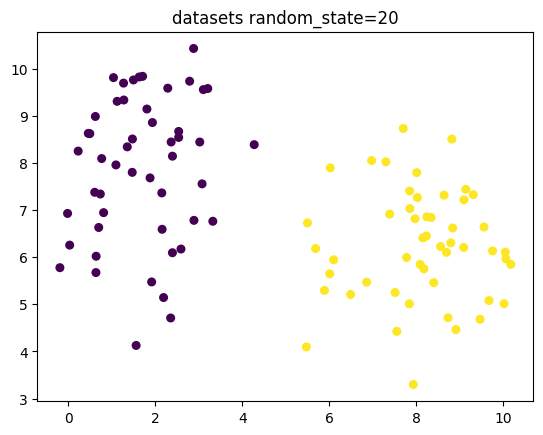

In [21]:
# 재현성을 위한 랜덤시드 고정
random_state = 20

# 합성데이터 생성
X, y = make_blobs(
    n_samples=100,  # 샘플의 수
    centers=2,  # 클러스터의 수. 이진분류 실습이므로 2로 설정
    cluster_std=1.2,  # 샘플의 표준편차
    random_state=random_state
)

plt.scatter(X[:,0], X[:,1], c=y, s=30)
plt.title('datasets random_state=20')
plt.show()

In [22]:
def make_xy_grid(xlim, ylim, n_points):
    #   1. x, y 각각이 일정 간격으로 변화하는 grid를 생성
    xx = np.linspace(*xlim, n_points)
    yy = np.linspace(*ylim, n_points)
    YY, XX = np.meshgrid(yy, xx)

    #   2. grid 위의 900개 점 좌표들을 순서대로 나타낸 array
    xy = np.stack([XX.reshape(-1), YY.reshape(-1)], axis=1)  # shape: (n^2, 2)
    return XX, YY, xy

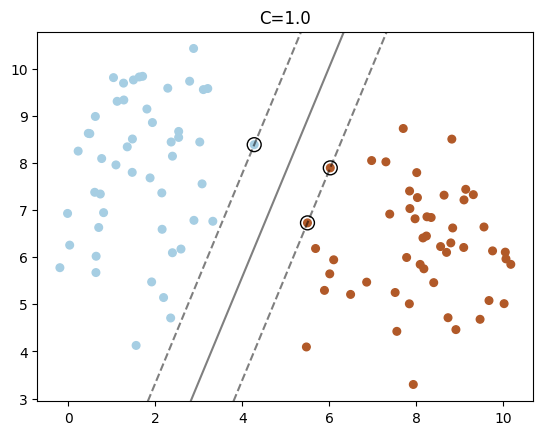

In [23]:
# 생성한 데이터로 SVM 분류기 모델 학습
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# 데이터셋 산점도 시각화
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

# 시각화를 위해 x, y값 범위를 확인
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 모델의 결정 경계 시각화
XX, YY, xy = make_xy_grid(xlim, ylim, 30)
Z = clf.decision_function(xy).reshape(XX.shape)

# 위에서 생성한 결정경계와 마진 시각화
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# 서포트 벡터를 표시
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('C=1.0')
plt.show()

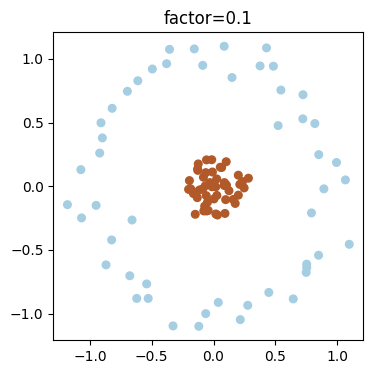

In [24]:
# 데이터 생성
X,y = make_circles(factor=0.1, noise=0.1) # factor: 생성할 원의 반지름 비율

# 생성한 데이터를 시각화
plt.figure(figsize=(4, 4))
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
plt.title('factor=0.1')
plt.show()

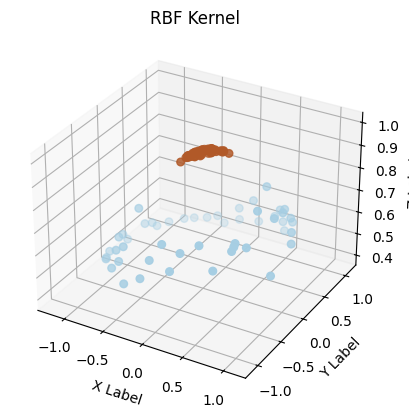

<Figure size 640x480 with 0 Axes>

In [25]:
# RBF 커널함수 적용
z = RBF(1.0).__call__(X)[0]

# 3D 공간에 커널함수 적용된 데이터셋을 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], z, c=y, s=30, cmap=plt.cm.Paired)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('RBF Kernel')
plt.show()
plt.clf()

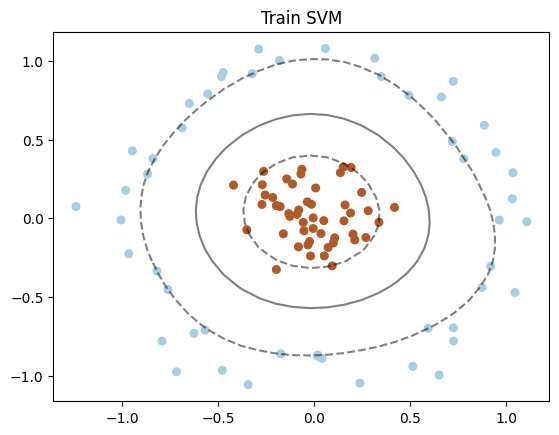

In [26]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # 결정경계 시각화
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#데이터셋 호출.
X,y=make_circles(factor=0.2,noise=0.1) #factor = R2/R1, noise=std
# 커널트릭을 적용한 SVM분류기 학습
#kernel을 rbf(Radial Basis Function)을 이용하여 SVC를 작동시켜보자.
clf = SVC(kernel="rbf").fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)
plot_svc_decision_function(clf)
plt.title('Train SVM')
plt.show()